# Handwritten Digits Recognition

In [5]:
# Imports

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train ,y_train) , (x_test, y_test) = mnist.load_data()

In [20]:
# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Add channel dimension (needed by the model)
x_train = np.expand_dims(x_train, axis=-1)  # shape becomes (num_samples, 28, 28, 1)
x_test = np.expand_dims(x_test, axis=-1)    # shape becomes (num_samples, 28, 28, 1)


In [21]:
# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


/Users/user/Projects/Handwritten_Digits_Recognition/env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# Compile the model
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])


In [6]:
# Train the model
model.fit(x_train, y_train, epochs=20)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.9026 - loss: 0.3097
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9847 - loss: 0.0487
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9898 - loss: 0.0312
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9926 - loss: 0.0236
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9948 - loss: 0.0159
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9958 - loss: 0.0131
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9958 - loss: 0.0124
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.9970 - loss: 0.0099
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9973 - loss: 0.0086
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9979 - loss: 0.0069
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9975 - loss: 0.0068
Epoch 12

In [7]:
# Assuming digit_model is your trained model
model.save('digit_model.h5')  # Save as .h5 file

In [8]:
# Evaluate the  train data of model
loss , accuracy = model.evaluate(x_train , y_train)
print (f"loss {loss} , accuracy {accuracy}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9989 - loss: 0.0040
loss 0.00415252149105072 , accuracy 0.9988333582878113


In [9]:
# Evaluate the  test  data of model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9899 - loss: 0.0599
Loss: 0.050000231713056564, Accuracy: 0.991599977016449


In [16]:
# Load and preprocess the custom image
image_path = ".//num4.png"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))  # Resize to 28x28 pixels
img = img.astype('float32') / 255.0  # Normalize pixel values to [0, 1]
img = np.expand_dims(img, axis=0)  # Add batch dimension

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


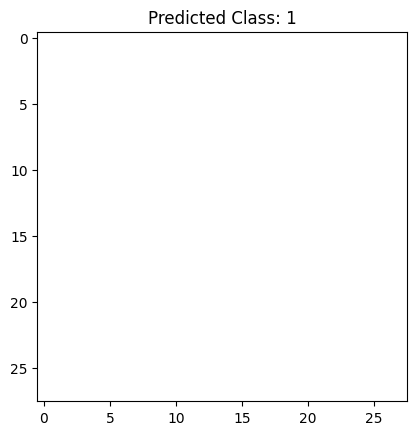

Prediction Result: [[0.08552972 0.42939577 0.03794456 0.0358427  0.08586085 0.0643336
  0.07147956 0.0593975  0.08800696 0.04220878]]
Predicted Class: 1


In [17]:
# Make prediction
prediction = model.predict(img)
predicted_class = np.argmax(prediction)


# Display the image and predicted class
plt.imshow(img[0], cmap=plt.cm.binary)
plt.title(f"Predicted Class: {predicted_class}")
plt.show()

print("Prediction Result:", prediction)
print("Predicted Class:", predicted_class)
